# CW1: Machine Learning Coursework Part 1

You will present your own code that performs nested cross-validation and the k-nearest neighbour algorithm, estimate distances between data samples, build confusion matrices and calculate performance metrics.

The purpose of this coursework is to help you:
- Get familiar with **common python modules / functions** used for ML in python
- Get practical experience **implementing** ML methods in python  
- Get practical experience regarding **parameter selection** for ML methods
- Get practical experience on **evaluating** ML methods and applying cross-validation

Notes:
- Don't use libraries that implement kNN, cross-validation, or any of the performance evaluation functions, unless explicitly asked to do so (or to validate the results of your code).  We want to see your code!
- Remember to comment all of your code. A substantial portion of the marks are given to useful, well-presented code documentation. For more on in-code comments, see here: 
https://medium.freecodecamp.org/code-comments-the-good-the-bad-and-the-ugly-be9cc65fbf83. 
- All functions should be clearly documented using informative docstrings. This should be a clear, textual description of the function inputs and outputs, and what the function does. For more info on docstrings, see here: https://www.programiz.com/python-programming/docstrings. 
- When a question allows a free-form answer (e.g. what do you observe?), create a new markdown cell below and answer the question in the notebook. 
- Save your notebook when you are done.
- The notebook code must execute fully to receive full marks. It is good practice to test this before submission by running Restart and Run all.
- Try to ensure that your notebook and code is clear and well-presented. 

**Plagiarism**: please make sure that the material you submit has been created by you. Any sources you use for code should be properly referenced. Your code will be checked for plagiarism using appropriate software.

----


In [413]:
# set matplotlib backend to inline
%matplotlib inline 

# import modules
from sklearn import datasets # import datasets
import numpy as np # import numpy
import matplotlib.pyplot as plt # import plots

# set the seed for the random number generator
mySeed=1234567

# load data
iris = datasets.load_iris() # load data 
X = iris.data # get features
y = iris.target # get targets
# print(iris.DESCR) # print dataset description

## 1. Exploratory Data Analysis

The first part of tackling any ML problem is visualising the data in order to understand some of the properties of the problem at-hand. The code below loads the iris dataset for you. With only 4 features (sepal length, sepal width, petal length, and petal width), and 3 classes, it is possible to use scatter plots to visualise interactions between different pairings of features. An example of how this visualisation might look is shown below:

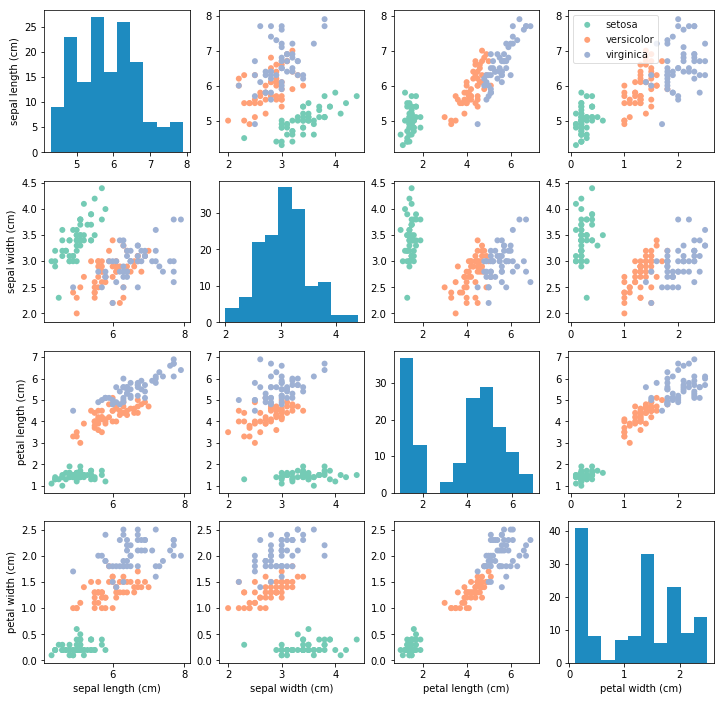

Your first task, drawing on the labs, is to recreate this 4x4 grid, with each off-diagonal subplot showing the interaction between two features, with each of the three classes represented as a different colour. The on-diagonal subplots (representing a single feature) should show a histogram on that feature.     

You should create a function that, given data X and labels y, plots this 4x4 grid.  The function should be invoked as,
        
    myplotGrid(X,y)
    
where X is your training data and y are the labels

----

In [420]:
def myplotGrid(X,y):
    # create a figure with multiple subplots
    fig = plt.figure(figsize=(12,12))
    # Your code here...
    count = 1 
    labels = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
    handles = []
    for i in range(0,4):
        for j in range(0,4):
            ax = fig.add_subplot(4, 4, count) 

            #If first plot in row, label y-axis        
            if j == 0:
                ax.set_ylabel(labels[i])

            #If plot in last row, label x-axis 
            if i == 3:
                ax.set_xlabel(labels[j])

            #If x and y are same attribute, create histogram instead          
            if i == j:
                plt.hist(X[:, i])

            else:
                scatter = plt.scatter(X[:, i], X[:, j], c=y, cmap=plt.cm.Paired)
            count += 1 

    legend1 = ax.legend(*scatter.legend_elements(),loc="lower left", title="Classes")
    ax.add_artist(legend1)

    

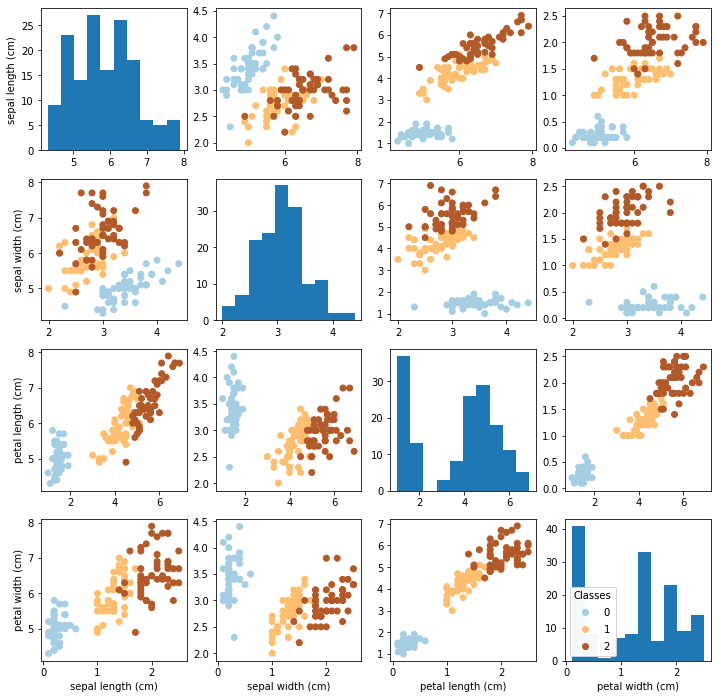

In [419]:
# run the plotting function
myplotGrid(X,y) # visualise data

### 1.2. Exploratory Data Analysis under noise

When data are collected under real-world settings (e.g., from webcams or other errors) they usually contain some amount of noise that makes classification more challenging. In the cell below, invoke your exploratory data analysis function above on a noisy version of your data X.

Try to perturb your data with some Gaussian noise,

    # initialize random seed to replicate results over different runs
    np.random.seed(mySeed) 
    XN=X+np.random.normal(0,0.5,X.shape)
    
and then invoke

    myplotGrid(XN,y)
    
-----


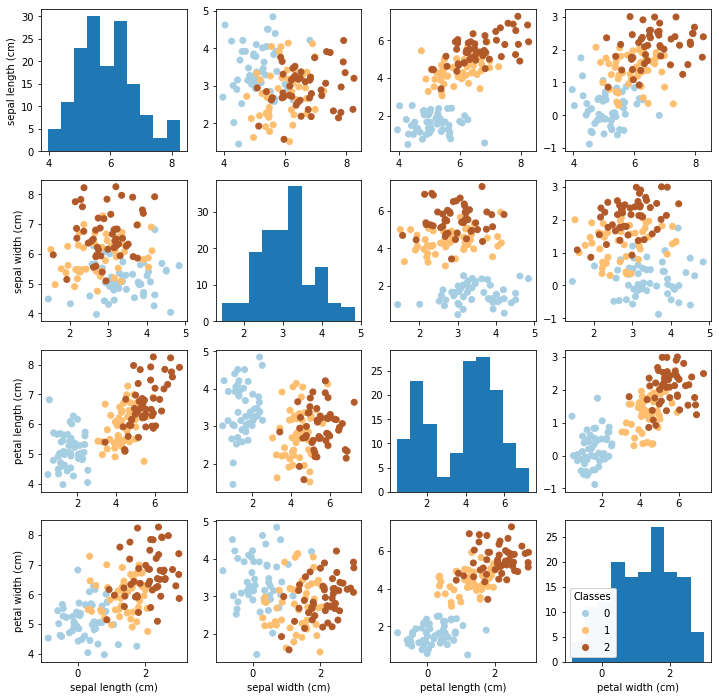

In [421]:
np.random.seed(mySeed)
XN=X+np.random.normal(0,0.5,X.shape)
myplotGrid(XN,y)

## 2. Implementing kNN

In the cell below, develop your own code for performing k-Nearest Neighbour classification.  You may use the scikit-learn k-NN implementation from the labs as a guide -- and as a way of verifying your results -- but it is important that your implementation does not use any libraries other than the basic numpy and matplotlib functions. 

Define a function that performs k-NN given a set of data.  Your function should be invoked similary to:

        y_ = mykNN(X,y,X_,options)
        
where X is your training data, y is your training outputs, X\_ are your testing data and y\_ are your predicted outputs for X\_.  The options argument (can be a list or a set of separate arguments depending on how you choose to implement the function) should at least contain the number of neighbours to consider as well as the distance function employed.

Hint: it helps to break the problem into various sub-problems, implemented as helper function. For example, you might want to implement a separate function for calculating the distances between two vectors, znd another function that uncovers the nearest neighbour(s) to a given vector. 

----

In [428]:
import math
from statistics import mode, StatisticsError

# input: lists in1 and in2 representing data points accross len(in1) = len(in2) dimensions 
# output: manhattan distance between two points
def manhattanDistance(in1,in2):
    sum = 0;
    for i in range(0, len(in1)):
        sum += math.fabs(in1[i] - in2[i])
    return sum

# input: lists in1 and in2 representing data points accross len(in1) = len(in2) dimensions 
# output: euclidean distance between two points
def euclideanDistance(in1,in2):
    sum = 0;
    for i in range(0, len(in1)):
        sum += math.pow(math.fabs(in1[i] - in2[i]), 2)
    return math.sqrt(sum)

# input: X: matrix training data, X_: one data point, dist_type: distance function (accepted values are 'euclidean' or 'manhattan')
#            size: size of X
# output: lsit of all neighbors of X_ in reverse order of distance (least first)
def getNeighbors(X, X_, dist_type, size):
    dist = []
    for i in range(0, size):
        in2 = X[i, :]
        
        if dist_type == 'euclidean':
            indexDist = (i, euclideanDistance(X_, in2))
        elif dist_type == 'manhattan':
            indexDist = (i, manhattanDistance(X_, in2))
        dist.append(indexDist)
        
    dist.sort(key= lambda x:x[1])

    neighbors = []
    for i in range(0, size):
        neighbors.append(dist[i][0])
    
    return neighbors

#input: nLabels (see assignLabel())
#output: one label of given type 
def breakTie(nLabels):
    label_weights = []
    for i in range(0, len(nLabels)):
        w = len(nLabels) - i
        lw = (nLabels[i], w)
        label_weights.append(lw)
    label_weights.sort(key= lambda x:x[0])
    
    weighted_frequencies = {}
    curr_tar = -1
    for lw in label_weights:
        if lw[0] == curr_tar:
            weighted_frequencies[lw[0]] += lw[1]
        else:
            curr_tar = lw[0]
            weighted_frequencies.update({lw[0]: lw[1]})
    mode = max(weighted_frequencies, key=weighted_frequencies.get)
    return mode
    
# Input: nLabels : labels (classes) of nearest neighbours of a test point
# Output: the assigned label
def assignLabel(nLabels):
    if len(nLabels)==1:
        return nLabels[0]
    else:
        try: 
            mode = statistics.mode(nLabels);
        except StatisticsError:
            mode = breakTie(nLabels)
        return mode

# Input:
#       X   : training data
#       y   : training outputs
#       X_  : point in test data (an array with a value for each attribute)
#       k   : number of neighbours to return
#       dist: distance function (accepted values are 'euclidean' or 'manhattan')
#       size: total number of training data
# Output: 
#       predicted output for X_

def mykNN(X, y, X_, k, dist, size):
    assert dist in ['euclidean','manhattan']
    assert k >= 0; 

#     Get all neighbors indices in order of distance from X_
    neighbors = getNeighbors(X, X_, dist, size)
    
#     Add k-nearest neighbors to list 
    kNN = []
    for i in range(0, k):
        kNN.append(neighbors[i])
#     Return label based on labels of k nearest neighbors 
    return assignLabel( y[kNN] )



In [429]:
# TEST CELL
from statistics import mode, StatisticsError
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

#import k-nn classifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import operator

np.random.seed(mySeed)
indices= np.random.permutation(X.shape[0]) 
bins=np.array_split(indices,2) # we  just need a training and testing set here
foldTrain=bins[0]
foldTest=bins[1]

knn=KNeighborsClassifier(n_neighbors=8, metric='euclidean')
knn.fit(X[foldTrain],y[foldTrain])
y_pred=knn.predict(X[foldTest])
print(accuracy_score(y[foldTest],y_pred))

correct=0;
for i in foldTest: #for all test points
    # knn classifier
    x_=X[i] # test point x_
    y_=y[i] # true label for y_
    trainX = X[foldTrain, :]
    trainy = y[foldTrain]
    
    label = mykNN(trainX, trainy, x_, 8, 'euclidean', len(foldTrain))
    
    # evaluate if the assigned label is correct (equal to y_)
    if label == y_:
        correct += 1

accuracy = correct / len(foldTest)
print(accuracy)

0.96
0.9866666666666667


## 3. Nested Cross-validation using your implementation of KNN

In the cell below, develop your own code for performing 5-fold nested cross-validation along with your implemenation of k-NN above. Within this you should write code that evaluates classifier performance. You must write your own code -- the scikit-learn module may only be used for verification purposes. 

Your code for nested cross-validation should invoke your kNN function (see above). You cross validation function should be invoked similary to:

    accuracies_fold, best_parameters_fold = myNestedCrossVal(X,y,5,list(range(1,11)),['euclidean','manhattan'],mySeed)
    
where X is your data matrix (containing all samples and features for each sample), 5 is the number of folds, y are your known output labels, ``list(range(1,11)`` evaluates the neighbour parameter from 1 to 10, and ``['euclidean','manhattan']`` evaluates the two distances on the validation sets.  mySeed is simply a random seed to enable us to replicate your results. The outputs could be a list of accuracy values, one per fold, and a list of the corresponding parameter tuples ``(distance, k)`` used to calculate these.

**Notes:** 
- you should perform nested cross-validation on both your original data X, as well as the data pertrubed by noise as shown in the cells above (XN)
- you should implement/validate **at least** two distance functions
- you should evaluate number of neighbours from 1 to 10
- your function should return a list of accuracies per fold, and a list of the corresponding parameters
- for each **fold**, your function should print:
  - the accuracy per distinct set of parameters on the validation set
  - the best set of parameters for the fold after validation
  - the confusion matrix per fold (on the testing set)

----

In [432]:
#input: y_test: true values , y_pred: predicted values, classno: number of classes
def myConfMat(y_test,y_pred,classno):
    C= np.zeros((classno**2,), dtype=int).reshape(classno, classno)
    
    #loop through all results and update the confusion matrix
    for i in range(0, len(y_test)):
        C[y_test[i]][y_pred[i]] +=1 
    return C

# Input:
#       X     : training data
#       y     : training outputs
#       nFolds: number of folds on which to perform train / val / test
#       kRange: list of k parameters for kNN 
#       dist  : list of distance function types (accepted values are 'euclidean' and/or 'manhattan')
#       seed  : a random seed 
# Output: 
#       1) list of of accuracy values (one per fold)
#       2) List of corresponding parameter tuples (distance, k)
def myNestedCrossVal(X, y, nFolds, kRange, dist, seed):
    np.random.seed(mySeed)
    accuracy_fold=[]
    parameters = [] 
    conf_mats = []
    
    indices=np.random.permutation(X.shape[0])
    bins=np.array_split(indices, nFolds)

    for i in range(0,nFolds):
        foldTrain=[] 
        foldTest=[]  
        foldVal=[]  
        bestDistance = ''
        bestNN = -1
        bestAccuracy = -10
        
        foldTest.extend(bins[i]) 
        if i== len(bins)-1: 
            foldVal.extend(bins[0])
            foldTrain.extend(bins[1:nFolds])
            foldTrain = np.array(foldTrain).flatten()
        else:
            foldVal.extend(bins[i+1])
            foldTrain.extend(bins[0:i])
            foldTrain.extend(bins[i+2:nFolds])
            foldTrain = np.array(foldTrain).flatten()
            
#       Find best parameters using validation set
        for i in range(0, len(dist)):
            for j in range(0, len(kRange)):
                correct = 0;
                for k in range(0, len(foldVal)):  #for all validation points
                    label =  mykNN(X[foldTrain, :], y[foldTrain], X[foldVal[k], :], kRange[j], dist[i], len(foldTrain))    
                   
                    # evaluate if the assigned label is correct (equal to y_)
                    if label == y[foldVal[k]]:
                        correct += 1
                #Accuracy for these params 
                accuracy= correct / len(foldVal)
                if accuracy > bestAccuracy:
                    bestAccuracy = accuracy;
                    bestNN = kRange[j]
                    bestDistance = dist[i]   
#       Store best parameters for fold i 
        k_dist = (bestNN, bestDistance)
        parameters.append(k_dist)
        
        #Evaluate on test data:
        #extend training set by including the validation set
        combined = []
        combined.extend(bins[0:i])
        combined.extend(bins[i+1:nFolds])
        combined = np.array(combined).flatten()

        test_correct = 0
        y_pred = []
        for i in range(0, len(foldTest)):  #for all test points
            label =  mykNN(X[combined, :], y[combined], X[foldTest[i], :], bestNN, bestDistance, len(foldTrain))    
    
            y_pred.append(label)
            # evaluate if the assigned label is correct (equal to y_)
            if label == y[foldTest[i]]:
                test_correct += 1
                
#       Generate confusion matrix
        cf = myConfMat(y[foldTest], y_pred, len(np.unique(y)))
        conf_mats.append(cf)

        #Accuracy for test set 
        test_accuracy= test_correct / len(foldTest)
        accuracy_fold.append(test_accuracy)      
        
    for i in range(0, len(accuracy_fold)):
        print("Fold: "  + str(i) + ", Accuracy: " + str(accuracy_fold[i]) + ", Params: " + str(parameters[i]))
        print(conf_mats[i])

    return accuracy_fold, parameters, conf_mats;

In [433]:
# TEST CELL
np.random.seed(mySeed)
accuracies_fold, best_parameters_fold, confusion_matrices = myNestedCrossVal(X,y,5,list(range(1,11)),['euclidean','manhattan'],mySeed)

mean = statistics.mean(accuracies_fold)
stdev = statistics.stdev(accuracies_fold)
print("Average accuracy: " + str(mean) + ", Standard deviation: " + str(stdev))

print('')

# noisy data
accuracies_foldN, best_parameters_foldN, confusion_matricesN = myNestedCrossVal(XN,y,5,list(range(1,11)),['euclidean','manhattan'],mySeed)

meanN = statistics.mean(accuracies_foldN)
stdevN = statistics.stdev(accuracies_foldN)
print("Average accuracy: " + str(meanN) + ", Standard deviation: " + str(stdevN))


Fold: 0, Accuracy: 0.9666666666666667, Params: (3, 'euclidean')
[[11  0  0]
 [ 0 10  1]
 [ 0  0  8]]
Fold: 1, Accuracy: 0.9333333333333333, Params: (5, 'euclidean')
[[12  0  0]
 [ 0 11  0]
 [ 0  2  5]]
Fold: 2, Accuracy: 1.0, Params: (1, 'euclidean')
[[ 5  0  0]
 [ 0 14  0]
 [ 0  0 11]]
Fold: 3, Accuracy: 1.0, Params: (5, 'euclidean')
[[11  0  0]
 [ 0  7  0]
 [ 0  0 12]]
Fold: 4, Accuracy: 1.0, Params: (1, 'euclidean')
[[11  0  0]
 [ 0  7  0]
 [ 0  0 12]]
Average accuracy: 0.98, Standard deviation: 0.029814239699997188

Fold: 0, Accuracy: 1.0, Params: (1, 'euclidean')
[[11  0  0]
 [ 0 11  0]
 [ 0  0  8]]
Fold: 1, Accuracy: 0.8, Params: (9, 'euclidean')
[[12  0  0]
 [ 0  8  3]
 [ 0  3  4]]
Fold: 2, Accuracy: 0.8333333333333334, Params: (10, 'euclidean')
[[ 5  0  0]
 [ 0 11  3]
 [ 0  2  9]]
Fold: 3, Accuracy: 1.0, Params: (5, 'euclidean')
[[11  0  0]
 [ 0  7  0]
 [ 0  0 12]]
Fold: 4, Accuracy: 0.9333333333333333, Params: (9, 'euclidean')
[[11  0  0]
 [ 0  7  0]
 [ 0  2 10]]
Average accur

### 3.2. Summary of results

Using your results from above, fill out the following table using the **clean** data:

| Fold | accuracy |  k  | distance |
| --- | --- | --- | --- |
| 1 | 0.96 |  3 |  euclidean |
| 2 | 0.93 |  5 |  euclidean |
| 3 | 1.00  |  1 |  euclidean |
| 4 | 1.00  |  5 |  euclidean |
| 5 | 1.00  |  1 |  euclidean |
| **total** | 0.98 $\pm$ 0.0298 |   |    |

Where **total** is given as an average over all the folds, and $\pm$ the standard deviation.

Now fill out the following table using the **noisy** data:

| Fold | accuracy |  k  | distance |
| --- | --- | --- | --- |
| 1 | 1.00  |  1 |  euclidean |
| 2 | 0.80  |  9 |  euclidean |
| 3 | 0.83  |  10 |  euclidean |
| 4 | 1.00  |  5 |  euclidean |
| 5 | 0.93  |  9 |  euclidean |
| **total** | 0.913 $\pm$ 0.093 |   |    |




### 3.3. Confusion matrix summary

Summarise the overall results of your nested cross validation evaluation of your K-NN algorithm using two summary confusion matrices (one for the noisy data, one for the clean data). You might want to adapt your code above to also return a list of confusion matrices (one for each fold),
 e.g.
 
    accuracies_fold, best_parameters_fold, confusion_matrix_fold = myNestedCrossValConf(X,y,5,list(range(1,11)),['euclidean','manhattan'],mySeed)

Then write a function to print the two matrices below. Make sure you label the matrix so that it is readable. You might also show class-relative precision and recall. 

----

In [437]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

#input: conf_mats: list of confusion matrices one per fold, classno: number of classes
#output: summary confusion matrix by summing values from each fold
def confMatSummary(conf_mats, classno):
    sum_cf = np.zeros((classno**2,), dtype=int).reshape(classno, classno)
    
    for i in range(0,classno):
        for j in range(0,classno):
            sum = 0
            for k in range(0,len(conf_mats)):
                sum += conf_mats[k][i][j]
            sum_cf[i][j] = sum
    return sum_cf

#input: title: matrix title, conf_mats: list of confusion matrices one per fold, targets: string names of targets/labels
#function: prints summary confusion matrix with labels 
def printSumMatrices(title, conf_mats, classno, targets):
    sum_cf = confMatSummary(conf_mats, classno)
    
    print('             ' + '             ' + title)
    print('')
    print('             ' + '           Predicted Values               ')
    print('             ' + '__________________________________________')
    print('            |' + '           ' + str(targets[0]) + ' ' + str(targets[1]) + ' ' + str(targets[2]))
    print('            |' + '  setosa   ' + str(sum_cf[0][0]) + '          ' + str(sum_cf[0][1]) + '          ' +  str(sum_cf[0][2]))
    print('True Values |' + 'versicolor ' + str(sum_cf[1][0]) + '          ' + str(sum_cf[1][1]) + '          ' +  str(sum_cf[1][2]))
    print('            |' + 'virginica  ' + str(sum_cf[2][0]) + '          ' + str(sum_cf[2][1]) + '          ' +  str(sum_cf[2][2]))
    print('            |' + '__________________________________________')
    print('')
    print('')
    print('')


    
printSumMatrices("Clean data", confusion_matrices, 3, ['setosa', 'versicolor', 'virginica'])
printSumMatrices("Noisy data", confusion_matricesN, 3, ['setosa', 'versicolor', 'virginica'])

                          Clean data

                        Predicted Values               
             __________________________________________
            |           setosa versicolor virginica
            |  setosa   50          0          0
True Values |versicolor 0          49          1
            |virginica  0          2          48
            |__________________________________________



                          Noisy data

                        Predicted Values               
             __________________________________________
            |           setosa versicolor virginica
            |  setosa   50          0          0
True Values |versicolor 0          44          6
            |virginica  0          7          43
            |__________________________________________





## 4. Questions 

Now answer the following questions as fully as you can. The answers should be based on your implementation above. Write your answers in new Markdown cells below each question.

### Q1. Choice of parameters
Do the best parameters change per fold? Is there one parameter choice that is best regardless of the data used?

Answer: The most variable parameter was the number of nearest neighbors that should be sampled (the k in kNN). The best distance measure, however, was consistently euclidean. 

### Q2.	 Clean vs. noisy
Does the best parameter choice change depending on whether we use clean or noisy data? (Answer for both distance function and number of neighbours.)

Answer: Using 5 folds, the average number of neighbors used to best predict clean data was 3 whereas for noisy data the average was 6.8, indicating that as more noicy data is added, it's necessary to look at more neighbors to optimize the prediction accuracy. The best distance function for both clean and noicy data was euclidean. 

### Q3. Exploratory data analysis
Looking again at the exploratory data analysis, what do you observe by plotting the figure for data without noise? What do you observe when you add Gaussian noise and plot again? 

Answer: The classes are more visualy distinct on the figure without noise. When Gaussian noise is added, there is more overlap of seeds with different classifications.

### Q4. Tie break
Assume that you have selected the number of neighbours to be an even number, e.g., 2. For one of the neighbours, the suggested class is 1, and for the other neighbour the suggested class is 2. How would you break the tie? Write example pseudocode that does this.

Answer:

The way I implemented a tie-breaker in my kNN allgorithm was by weighting certain labels over others based on how near or far a neighbor they are from the unabeled sample. It also occured to me that by adding or subtracting 1 from k would easily break the tie, but this method is more likely to have issues if there are more than 2 classes (as in this case) and doesn't accurately represent the best-fit k parameter used to label the data, which is important in cross-validation. 

The way I implemented getNeighbors() meant that I already had a list of k neighbors sorted by distance with the nearest neighbor at index 0. So for a range of i = 0 ... k, I added the weight k-i to the label so that the the nearest neighbor would have the highest weight of k and the farthest neighbor would have the lowest weight of k - (k-1). I then computed the cumulative weight for each label and returned the 'heaviest'. The code I used in mykNN() to accomplish this I have copied into the cell below. 

To further optimize the accuracy of tie-breaking, I could implement multiple tie-breaking algorithms and include a parameter in myNestedCrossVal() to optimize the tie-breaking method used similar to how k and the distance funciton are optimized. 


In [149]:
def breakTie(nLabels):

    label_weights = []
    for i in range(0, len(nLabels)):
        w = len(nLabels) - i
        lw = (nLabels[i], w)
        label_weights.append(lw)
    label_weights.sort(key= lambda x:x[0])
    
    weighted_frequencies = {}
    curr_tar = -1
    for lw in label_weights:
        if lw[0] == curr_tar:
            weighted_frequencies[lw[0]] += lw[1]
        else:
            curr_tar = lw[0]
            weighted_frequencies.update({lw[0]: lw[1]})
    mode = max(weighted_frequencies, key=weighted_frequencies.get)
    return mode

### Q5.	Improving performance on noisy data. 
The performance of k-NN on the noisy data should be worse than on the clean data. Suggest at least one way of improving the performance on the noisy data. Try to elaborate on your idea as much as possible, including pseudocode where possible.

Answer: Using the noisy data, a test sample will be more likely to be in close proximity to training data of multiple classes, so one way to possibly improve the performance on noisy data would be to increase the range of k neighbors. This would be as simple as calling the function myNestedCrossVal(X, y, nFolds, kRange, dist, seed) and increasing the paramater kRange. 